In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('./data/dataset_scaled2.csv')

In [3]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
for c in X.columns:
    X[c] = (X[c].values - X[c].values.min(0)) / X[c].values.ptp(0)

In [4]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.values)

In [5]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(10,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05,0.1],
    'learning_rate': ['constant','adaptive'],
}
'''
Best parameters found:
 {'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}
'''
scores = []
for size in np.array((range(len(X.columns))))[1:]:
    X_small = X[featureScores.nlargest(size,'Score')['Specs'].values]
    X_train, X_test, y_train, y_test = train_test_split(X_small, y, train_size=0.7, random_state = 0)
    clf = MLPClassifier(max_iter=1000,solver='adam',alpha=0.05,hidden_layer_sizes=(100,))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_test,y_test))
    prec,rec,fs,_  = precision_recall_fscore_support(y_test,y_pred,average='macro')
    scores.append([prec,rec,fs])

0.43217665615141954
0.6182965299684543
0.7255520504731862
0.7917981072555205
0.8706624605678234
0.889589905362776
0.889589905362776
0.8832807570977917
0.9053627760252366
0.8958990536277602
0.8958990536277602
0.9305993690851735
0.8990536277602523
0.9337539432176656
0.9400630914826499
0.9495268138801262
0.9463722397476341
0.9526813880126183
0.9463722397476341
0.9526813880126183
0.9652996845425867
0.9495268138801262
0.9558359621451105
0.9652996845425867
0.9621451104100947
0.9652996845425867
0.9526813880126183
0.9621451104100947
0.9589905362776026
0.9526813880126183
0.9621451104100947
0.9589905362776026
0.9558359621451105
0.9716088328075709
0.9684542586750788
0.9652996845425867
0.9716088328075709
0.9621451104100947
0.9684542586750788
0.9684542586750788
0.9621451104100947
0.9589905362776026
0.9716088328075709
0.9621451104100947
0.9589905362776026
0.9621451104100947
0.9495268138801262
0.9589905362776026
0.9621451104100947
0.9589905362776026
0.9684542586750788
0.9558359621451105
0.96529968454

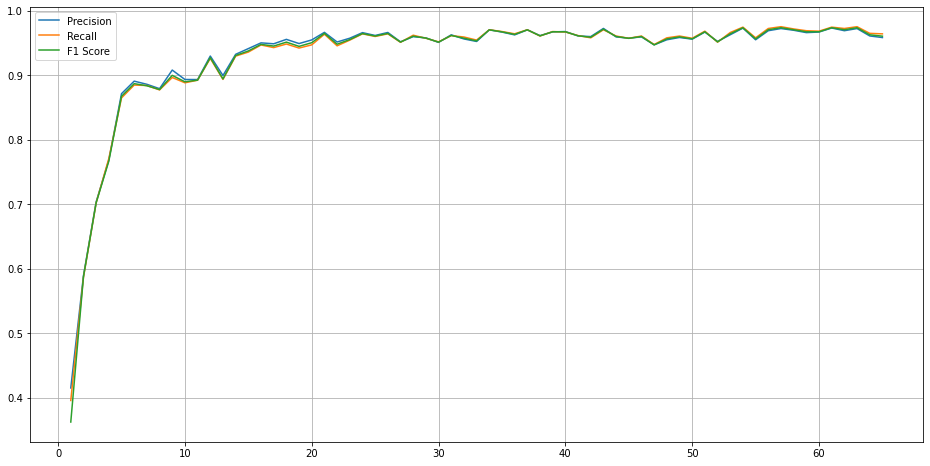

In [6]:
scores = np.array(scores)
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(list(range(1,len(X.columns))),scores[:,0],label='Precision')
plt.plot(list(range(1,len(X.columns))),scores[:,1],label='Recall')
plt.plot(list(range(1,len(X.columns))),scores[:,2],label='F1 Score')

plt.legend()
plt.grid()
plt.show()

In [7]:
np.savetxt('ann.csv',scores)

In [24]:
ann = np.loadtxt('ann.csv')
svm = np.loadtxt('svm.csv')

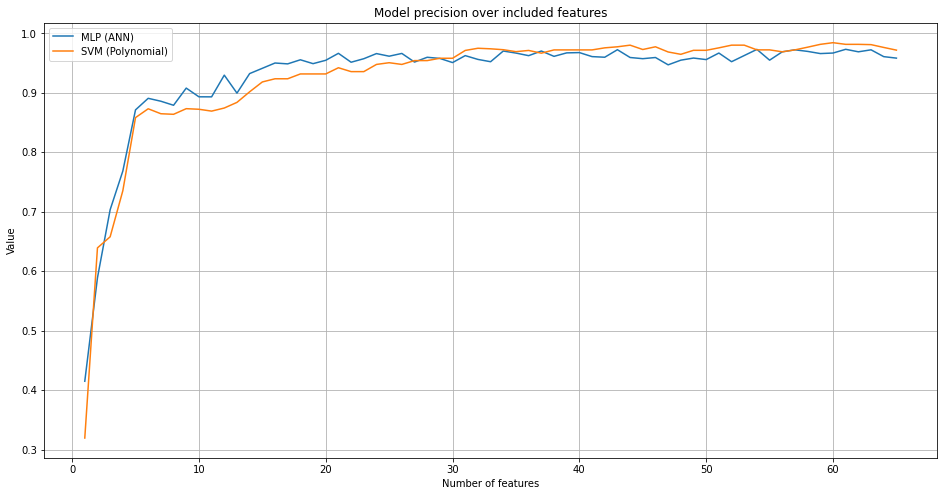

In [25]:
plt.plot(list(range(1,len(X.columns))),ann[:,0],label='MLP (ANN)')
plt.plot(list(range(1,len(X.columns))),svm[:,0],label='SVM (Polynomial)')
plt.grid()
plt.title('Model precision over included features')
plt.xlabel('Number of features')
plt.ylabel('Value')
plt.legend()
plt.savefig('prec.png')
plt.show()

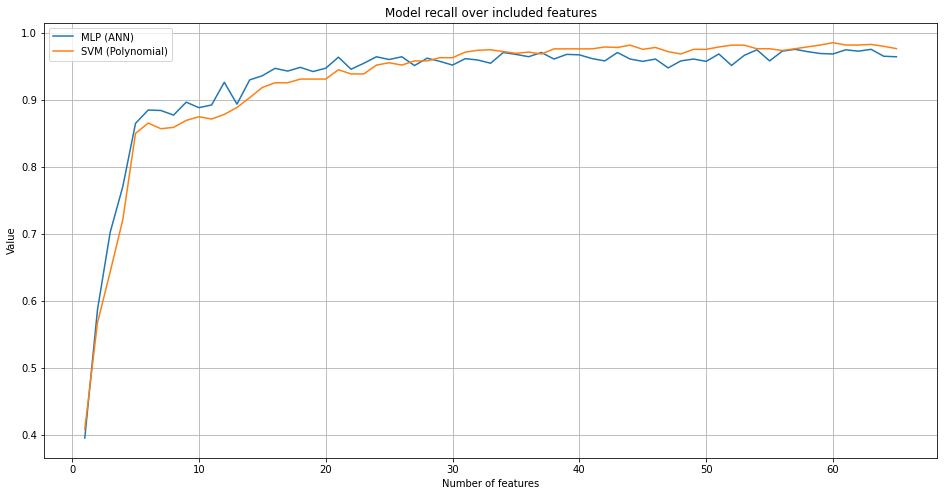

In [26]:
plt.plot(list(range(1,len(X.columns))),ann[:,1],label='MLP (ANN)')
plt.plot(list(range(1,len(X.columns))),svm[:,1],label='SVM (Polynomial)')
plt.grid()
plt.title('Model recall over included features')
plt.xlabel('Number of features')
plt.ylabel('Value')
plt.legend()
plt.savefig('recall.png')
plt.show()

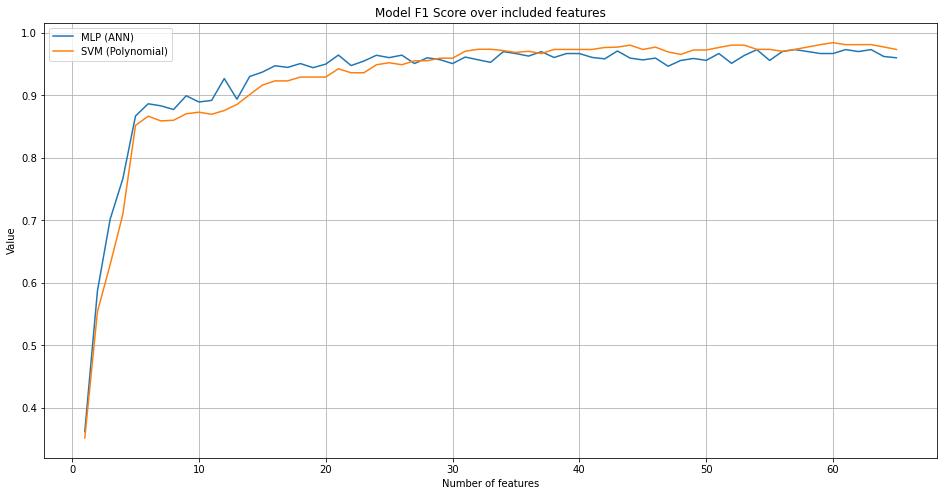

In [27]:
plt.plot(list(range(1,len(X.columns))),ann[:,2],label='MLP (ANN)')
plt.plot(list(range(1,len(X.columns))),svm[:,2],label='SVM (Polynomial)')
plt.grid()
plt.title('Model F1 Score over included features')
plt.xlabel('Number of features')
plt.ylabel('Value')
plt.legend()
plt.savefig('f1.png')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

In [21]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14, vmax=100):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    cmap = sns.cubehelix_palette(n_colors=50, hue=0.1, rot=0, light=0.9, dark=0, as_cmap=True)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt="d", cmap=cmap, vmax=vmax, cbar=False)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.close(fig)
    return fig

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 0)
clf = MLPClassifier(max_iter=1000,solver='adam',alpha=0.05,hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
labels = ["Forward-Backward Dribbling","Left-Right Dribbling","Regular Dribbling","Two Hands Dribbling","Shooting","Layup"]
cm = confusion_matrix(y_test, y_pred)


In [23]:
fig = print_confusion_matrix(cm,[1,2,3,4,5,6])
fig.savefig('cm_ann.png')
